In [1]:
#class for managing interactions between model and podcast database.
import pickle
import time
import pandas as pd
import gensim
import numpy as np
import scipy
from sklearn import decomposition,mixture
import sklearn
from matplotlib import pyplot as plt, rcParams
import matplotlib
rcParams.update({'font.size': 15})
from nltk.tokenize import TreebankWordTokenizer,WhitespaceTokenizer
from nltk.corpus import stopwords
import string

class PodcastDB:
    #static class variables
    wp = WhitespaceTokenizer()

    #initialize object
    def __init__(self,fid=None,model=None):
        if(fid is not None):
            self.podcastdb = pickle.load(fid)
            self.w2vs = [v for v in self.podcastdb['w2v']]
            self.npodcast = self.podcastdb.shape[0]
        else:
            raise ValueError('Object constructor must be called with a valid file ID')
            self.podcastdb = None
            self.w2vs = None
            self.npodcast = 0
            
        if(isinstance(model,gensim.models.keyedvectors.Word2VecKeyedVectors)):
            self.model = model
        else:
            raise ValueError('Object constructor must be called with a valid model')
            self.model = None
            
    #primary method. finds podcasts most similar to some word.
    def search(self,word,n_outputs=10):
        
        word = self._preprocess_input(word)
        
        #ensures that object is properly initialized
        if((self.podcastdb is None) or (self.model is None)):
            raise ClassError('Object not properly initialized.')
            
        if(not word):
            raise ValueError('Input contains no valid words.')
        
        return self.podcastdb.iloc[self.__compare(self._evaluate(word)).argsort()[:n_outputs]]
        
    
    #apply internal model to a single word. 
    def _evaluate(self,word):
        if(isinstance(word,list)):
            return self.__evaluate_set(word)
        elif(isinstance(word,str)):
            #attempt to get vectorial representation of word.
            try:
                return self.model[word]
            except KeyError as e:
                return np.full([300,],np.nan)
        else:
            raise TypeError()
            
    #apply the model to a set of words and average them. 
    #this is simply ep2vec from other scripts.
    def __evaluate_set(self,words):
        #evaluate each word in 
        n = 0
        a = []
        for w in words:
            #attempt to evaluate vectorial representation of word.
            try:
                v = self.model[w]
                if((np.isnan(v).any() + np.isinf(v).any()) == 0):
                    a.append(v)
                    n += 1
            except KeyError as e:
                pass
        #if nothing was valid, return nan
        if(n==0):
            return np.full([300,], np.nan)
        #return average
        return np.mean(np.array(a),axis=0)
        
    #compares vector 
    def __compare(self,u):
        #give comparator function an alias so we can change it up if desirable.
        comparator = scipy.spatial.distance.cosine
        
        #return distances between vector and all our podcasts.
        return np.array([comparator(u,v) for v in self.w2vs])
    
    #This removes non-alphabetical characters and makes everything lower case
    @classmethod
    def __clean(cls,text):
        return ''.join(c for c in text.lower() if c in string.ascii_lowercase+' ')
    
    #this tokenizes intelligently
    @classmethod
    def __tokenize(cls,text):
        #return TreebankWordTokenizer().tokenize(text)
        return cls.wp.tokenize(text)

    #takes out stopwords
    @classmethod
    def __remove_stop_words(cls,tokens):
        return [word for word in tokens if word not in stopwords.words('english')]
    
    #this will clean & tokenize a list of documents.
    @classmethod
    def _preprocess_input(cls,textinput):
        return cls.__remove_stop_words(cls.__tokenize(cls.__clean(textinput)))
    

In [2]:
#load in podcast df, gensim model, and put it in the database object.

floc = '/home/bmassi/Dropbox/professional/Insight/data/'
modelfname = 'GoogleNews-vectors-negative300.bin'
podcastfname = 'podcast_df_subset_'+'1528986544'+'.pkl'
word2vec = gensim.models.KeyedVectors.load_word2vec_format(floc+modelfname, binary=True)


In [3]:
with open(floc+podcastfname,'rb') as fid:
    podcastdb = PodcastDB(fid=fid,model=word2vec)

In [4]:
podcastdb.search('sriracha food china')

,artistId,artistName,artistViewUrl,artworkUrl100,artworkUrl30,artworkUrl60,artworkUrl600,collectionCensoredName,collectionExplicitness,collectionHdPrice,...,trackExplicitness,trackHdPrice,trackHdRentalPrice,trackId,trackName,trackPrice,trackRentalPrice,trackViewUrl,wrapperType,w2v
6889,1.231290e+09,Milk Street Radio,https://itunes.apple.com/us/artist/milk-street...,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,Christopher Kimball’s Milk Street Radio,cleaned,0,...,cleaned,0,0,1158889592,Christopher Kimball’s Milk Street Radio,0.0,0,https://itunes.apple.com/us/podcast/christophe...,track,"[-0.054589443, 0.041850373, 0.020195425, 0.156..."
8177,1.216766e+08,BBC Radio Ulster,https://itunes.apple.com/us/artist/bbc/1216766...,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,Cooking with Paula McIntyre,cleaned,0,...,cleaned,0,0,344105585,Cooking with Paula McIntyre,0.0,0,https://itunes.apple.com/us/podcast/cooking-wi...,track,"[-0.09841971, 0.037238963, 0.03578569, 0.20422..."
13935,NaN,WYPR Baltimore,NaN,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,Foreman and Wolf on Food and Wine on WYPR,cleaned,0,...,cleaned,0,0,1160574030,Foreman and Wolf on Food and Wine on WYPR,0.0,0,https://itunes.apple.com/us/podcast/foreman-an...,track,"[-0.059889676672736966, 0.03864685523137356, -..."
27984,NaN,Pass the Chipotle Podcast,NaN,https://is2-ssl.mzstatic.com/image/thumb/Music...,https://is2-ssl.mzstatic.com/image/thumb/Music...,https://is2-ssl.mzstatic.com/image/thumb/Music...,https://is2-ssl.mzstatic.com/image/thumb/Music...,Pass the Chipotle Podcast,cleaned,0,...,cleaned,0,0,1227869386,Pass the Chipotle Podcast,0.0,0,https://itunes.apple.com/us/podcast/pass-the-c...,track,"[-0.04831529, 0.014612237, 0.019195016, 0.1421..."
38985,1.123846e+09,Winston Carter & David Zwick | Campfire Media,https://itunes.apple.com/us/artist/campfire-me...,https://is2-ssl.mzstatic.com/image/thumb/Music...,https://is2-ssl.mzstatic.com/image/thumb/Music...,https://is2-ssl.mzstatic.com/image/thumb/Music...,https://is2-ssl.mzstatic.com/image/thumb/Music...,"Try It, You'll Like It",explicit,0,...,explicit,0,0,1336694972,"Try It, You'll Like It",0.0,0,https://itunes.apple.com/us/podcast/try-it-you...,track,"[-0.038857814, 0.052018065, 0.017092362, 0.141..."
38156,NaN,Dubai Eye 103.8,NaN,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,https://is1-ssl.mzstatic.com/image/thumb/Music...,The Thursday Brunch on Dubai Today,cleaned,0,...,cleaned,0,0,1218677625,The Thursday Brunch on Dubai Today,0.0,0,https://itunes.apple.com/us/podcast/the-thursd...,track,"[-0.05086372, 0.04123032, 0.014488361, 0.11808..."
31521,NaN,Joanne Bender,NaN,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,https://is5-ssl.mzstatic.com/image/thumb/Music...,Reserve This!,cleaned,0,...,cleaned,0,0,1159122208,Reserve This!,0.0,0,https://itunes.apple.com/us/podcast/reserve-th...,track,"[-0.06507386, 0.02742441, 0.0055947127, 0.1590..."
12803,NaN,Faith Middleton,NaN,https://is2-ssl.mzstatic.com/image/thumb/Music...,https://is2-ssl.mzstatic.com/image/thumb/Music...,https://is2-ssl.mzstatic.com/image/thumb/Music...,https://is2-ssl.mzstatic.com/image/thumb/Music...,Faith Middleton Food Schmooze,cleaned,0,...,cleaned,0,0,1058989086,Faith Middleton Food Schmooze,0.0,0,https://itunes.apple.com/us/podcast/faith-midd...,track,"[-0.03291016, 0.029701993, 0.00632327

In [5]:
#Fit a gaussian mixture model for clustering to see how well topics are separated in vector space.
import numpy as np

n_components=10

#pull out podcast vectors and fit.
X = np.array(podcastdb.w2vs)#training examples
print(X.shape)
gmm = mixture.GaussianMixture(n_components=n_components)
gmm.fit(X)

X_labels = gmm.predict(X)

(31311, 300)


Text(0.5,1,'Clusters of podcast vectors (21.0% variance)')

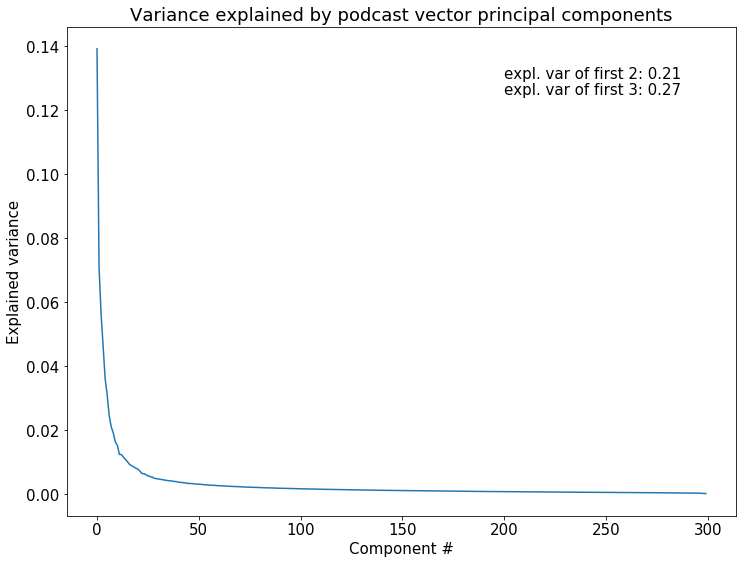

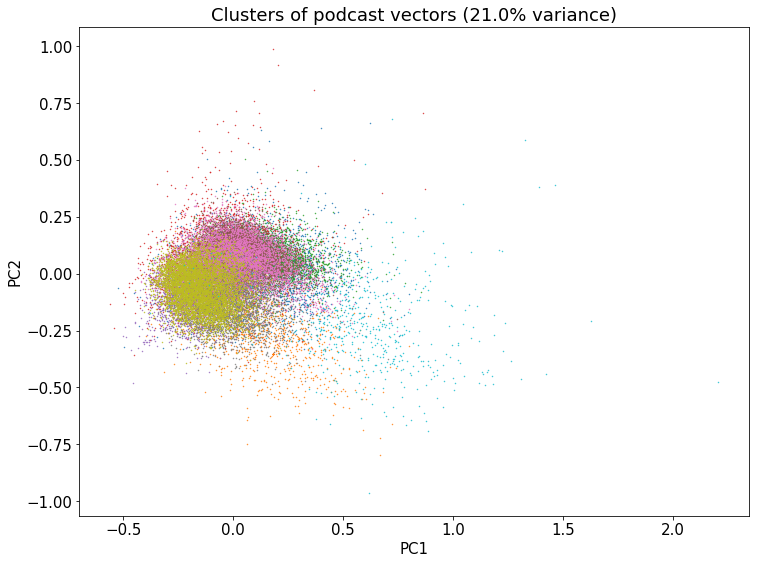

In [7]:
#Perform PCA to examine how explained variance is distributed across principal components. 
from sklearn import decomposition,mixture
import sklearn
from matplotlib import pyplot as plt, rcParams
import matplotlib
rcParams.update({'font.size': 15})

X = np.array(podcastdb.w2vs)
pca = sklearn.decomposition.PCA()
pca.fit(X)

plt.figure(figsize=[12,9])
plt.plot(range(0,len(pca.explained_variance_ratio_)),pca.explained_variance_ratio_)
plt.xlabel('Component #')
plt.ylabel('Explained variance')
plt.title('Variance explained by podcast vector principal components')
plt.text(200,.13,'expl. var of first 2: %.2f' % sum(pca.explained_variance_ratio_[0:2]))
plt.text(200,.125,'expl. var of first 3: %.2f' % sum(pca.explained_variance_ratio_[0:3]))

#reduce data to first 2 dimensions and plot according to cluster membership. 
ndim = 2
X_reduced = np.matmul(X-np.mean(X, axis=0),pca.components_[0:ndim].T)

cmap = plt.get_cmap('tab10')
plt.figure(figsize=[12,9])
for l in np.unique(X_labels):
    X_thiscluster = X_reduced[X_labels==l,:]
    plt.scatter(X_thiscluster[:,0],X_thiscluster[:,1],s=.2,c=cmap(l))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of podcast vectors (%.1f%% variance)' % sum(100*pca.explained_variance_ratio_[0:2]))